In [1]:
import numpy as np 
import pandas as pd

In [2]:
d = pd.read_html('https://www.worldathletics.org/records/all-time-toplists/middle-long/1500-metres/outdoor/men/senior?regionType=world&page=1&bestResultsOnly=true&firstDay=1900-01-01&lastDay=2021-05-10')

In [3]:
df = d[0]

In [4]:
df.head()

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score
0,1,3:26.00,Hicham EL GUERROUJ,14 SEP 1974,MAR,1,NaN,"Stadio Olimpico, Roma (ITA)",14 JUL 1998,1302
1,2,3:26.34,Bernard LAGAT,12 DEC 1974,KEN,2,NaN,Bruxelles (BEL),24 AUG 2001,1297
2,3,3:26.69,Asbel KIPROP,30 JUN 1989,KEN,1,NaN,"Stade Louis II, Monaco (MON)",17 JUL 2015,1292
3,4,3:27.37,Noureddine MORCELI,28 FEB 1970,ALG,1,NaN,Nice (FRA),12 JUL 1995,1282
4,5,3:27.64,Silas KIPLAGAT,20 AUG 1989,KEN,1,NaN,"Stade Louis II, Monaco (MON)",18 JUL 2014,1279


In [5]:
base_url='https://www.worldathletics.org/records/all-time-toplists/middle-long/1500-metres/outdoor/men/senior?regionType=world&page={}&bestResultsOnly=true&firstDay=1900-01-01&lastDay=2021-05-10'

In [7]:
#we can use this as counter for page 
for n in range(5):
    print(n)

0
1
2
3
4


In [8]:
#the for loop can be used like this 
base_url.format(2)

'https://www.worldathletics.org/records/all-time-toplists/middle-long/1500-metres/outdoor/men/senior?regionType=world&page=2&bestResultsOnly=true&firstDay=1900-01-01&lastDay=2021-05-10'

In [9]:
#lets try for 1500 m 
main_list = []
for n in range(44):
    d = pd.read_html(base_url.format(n))
    df = d[0]
    main_list.append(df)
    
big_data = pd.concat(main_list)

In [10]:
big_data.head(4365)

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score
0,1,3:26.00,Hicham EL GUERROUJ,14 SEP 1974,MAR,1,NaN,"Stadio Olimpico, Roma (ITA)",14 JUL 1998,1302
1,2,3:26.34,Bernard LAGAT,12 DEC 1974,KEN,2,NaN,Bruxelles (BEL),24 AUG 2001,1297
2,3,3:26.69,Asbel KIPROP,30 JUN 1989,KEN,1,NaN,"Stade Louis II, Monaco (MON)",17 JUL 2015,1292
3,4,3:27.37,Noureddine MORCELI,28 FEB 1970,ALG,1,NaN,Nice (FRA),12 JUL 1995,1282
4,5,3:27.64,Silas KIPLAGAT,20 AUG 1989,KEN,1,NaN,"Stade Louis II, Monaco (MON)",18 JUL 2014,1279
...,...,...,...,...,...,...,...,...,...,...
60,4252,3:43.0h,Philemon CHEMORWA,NaN,KEN,1,NaN,Nyeri (KEN),03 APR 2004,1067
61,4252,3:43.0h,Peter KOSKEI,NaN,KEN,1,NaN,Nairobi (KEN),04 JUN 2004,1067
62,4262,3:43.00,Ben TICKNER,13 JUL 1981,GBR,9,NaN,Watford (GBR),10 JUN 2006,1067
63,4253,3:43.0h,Stephen KOECH,16 DEC 1976,KEN,1,NaN,Kakamega (KEN),24 JUN 2006,1067


In [11]:
big_data.reset_index(drop=True,inplace=True)

In [12]:
import re 

In [15]:
big_data['Mark'][0]


'3:26.00'

A way to convert the time stamp data which is a string into seconds https://stackoverflow.com/questions/50308629/python-pandas-column-convert-minutes-to-second

In [16]:
#This is how we can split the time data to access each string 
#we have to change this string into int to get time in seconds 
re.split(pattern=r'[:\.]',string=big_data['Mark'][0])
#here 3 is min, 26 is sec and 00 is milisec 

['3', '26', '00']

In [17]:
df['time_sec']= [(int(a)*60)+int(b)+(int(c)/1000) for a,b,c in re.split(pattern=r'[:\.]',string=big_data['Mark'])]

TypeError: expected string or bytes-like object

for a,b,c in big_data['Mark'].str.split(r'[:.]'): print(c) this is the way to use pandas split function https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/ the above link shows pandas * regular expression

In [18]:
df['time_sec']= [(int(a)*60)+int(b)+(int(c)/1000) for a,b,c in big_data['Mark'].str.split(r'[:\.]')]

ValueError: invalid literal for int() with base 10: '2h'

The issue above was that in the time string there are some miliseconds that end with h

In [19]:
big_data[big_data['Mark']==':0h']
#this commmand did not work 

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score


In [20]:
#so here we will use the regex method 
pattern = '\d:\d\d.\d\D'
big_data[big_data['Mark'].str.match(pattern)==True]

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score
223,124,3:32.2h,Filbert BAYI,23 JUN 1953,TAN,1,NaN,Christchurch (NZL),02 FEB 1974,1214
230,131,3:32.4h,John WALKER,12 JAN 1952,NZL,1,NaN,Oslo (NOR),30 JUL 1975,1211
260,161,3:33.1h,Jim RYUN,29 APR 1947,USA,1,NaN,"Los Angeles, CA (USA)",08 JUL 1967,1201
340,241,3:34.0h,Jean WADOUX,29 JAN 1942,FRA,1,NaN,Colombes (FRA),23 JUL 1970,1188
342,242,3:34.0h,Moses KIPTANUI,01 OCT 1970,KEN,1,NaN,Nairobi (KEN),13 JUN 1992,1188
...,...,...,...,...,...,...,...,...,...,...
4363,4253,3:43.0h,Stephen KOECH,16 DEC 1976,KEN,1,NaN,Kakamega (KEN),24 JUN 2006,1067
4364,4253,3:43.0h,Joseph EBUYA,20 JUN 1987,KEN,6,NaN,Kakamega (KEN),21 APR 2007,1067
4365,4253,3:43.0h,Geoffrey KIPLAGAT,NaN,KEN,5h1,NaN,Nairobi (KEN),21 MAY 2010,1067
4366,4253,3:43.0h,Willy KIMUTAI,1994,KEN,1f2,NaN,Nairobi (KEN),14 APR 2012,1067


In [21]:
#now all we need to do is convert that h to 0 
big_data['t_raw']= big_data['Mark'].str.replace('h','0',regex=True)

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html we used the above function to convert the millisecond values we assume that h=0

In [22]:
#now we have successfully got all proper time values 
big_data['t_raw']

0       3:26.00
1       3:26.34
2       3:26.69
3       3:27.37
4       3:27.64
         ...   
4368    3:43.00
4369    3:43.00
4370    3:43.00
4371    3:43.00
4372    3:43.00
Name: t_raw, Length: 4373, dtype: object

In [23]:
big_data['time_sec']= [int(a)*60+int(b)+int(c)/1000 for a,b,c in big_data['t_raw'].str.split(r'[:\.]')]

In [24]:
#Final 1500m data set 
big_data.head()

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score,t_raw,time_sec
0,1,3:26.00,Hicham EL GUERROUJ,14 SEP 1974,MAR,1,NaN,"Stadio Olimpico, Roma (ITA)",14 JUL 1998,1302,3:26.00,206.000
1,2,3:26.34,Bernard LAGAT,12 DEC 1974,KEN,2,NaN,Bruxelles (BEL),24 AUG 2001,1297,3:26.34,206.034
2,3,3:26.69,Asbel KIPROP,30 JUN 1989,KEN,1,NaN,"Stade Louis II, Monaco (MON)",17 JUL 2015,1292,3:26.69,206.069
3,4,3:27.37,Noureddine MORCELI,28 FEB 1970,ALG,1,NaN,Nice (FRA),12 JUL 1995,1282,3:27.37,207.037
4,5,3:27.64,Silas KIPLAGAT,20 AUG 1989,KEN,1,NaN,"Stade Louis II, Monaco (MON)",18 JUL 2014,1279,3:27.64,207.064


In [25]:
#we can also try another ay to find total seconds using 
from datetime import timedelta

In [26]:
def second_calculator(x):
    mins,secs,millis= map(int, re.split(pattern=r'[:\.]',string=x))
    td = timedelta(minutes=mins,seconds=secs,milliseconds=millis)
    return td.total_seconds()

we get the above function idea from here - https://stackoverflow.com/questions/50308629/python-pandas-column-convert-minutes-to-second

In [27]:
big_data['t_sec']= big_data['t_raw'].apply(second_calculator)

In [28]:
big_data.head()

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score,t_raw,time_sec,t_sec
0,1,3:26.00,Hicham EL GUERROUJ,14 SEP 1974,MAR,1,NaN,"Stadio Olimpico, Roma (ITA)",14 JUL 1998,1302,3:26.00,206.000,206.000
1,2,3:26.34,Bernard LAGAT,12 DEC 1974,KEN,2,NaN,Bruxelles (BEL),24 AUG 2001,1297,3:26.34,206.034,206.034
2,3,3:26.69,Asbel KIPROP,30 JUN 1989,KEN,1,NaN,"Stade Louis II, Monaco (MON)",17 JUL 2015,1292,3:26.69,206.069,206.069
3,4,3:27.37,Noureddine MORCELI,28 FEB 1970,ALG,1,NaN,Nice (FRA),12 JUL 1995,1282,3:27.37,207.037,207.037
4,5,3:27.64,Silas KIPLAGAT,20 AUG 1989,KEN,1,NaN,"Stade Louis II, Monaco (MON)",18 JUL 2014,1279,3:27.64,207.064,207.064


In [29]:
#now lets get for 2000m 
base_url2='https://www.worldathletics.org/records/all-time-toplists/middle-long/2000-metres/outdoor/men/senior?regionType=world&page={}&bestResultsOnly=true&firstDay=1900-01-01&lastDay=2021-05-10'

#scrape through each page.There are 8 pages 

main_list2 = []
for n in range(9):
    d2 = pd.read_html(base_url2.format(n))
    df2 = d2[0]
    main_list2.append(df2)
    
big_data2 = pd.concat(main_list2)

#reset the index 
big_data2.reset_index(drop=True,inplace=True)

#convert the h in millis to 0 
big_data2['t_raw']= big_data2['Mark'].str.replace('h','0',regex=True)

#calculate total seconds 
big_data2['t_sec']= big_data2['t_raw'].apply(second_calculator)

In [30]:
#next we go for 3000m 
base_url3= 'https://www.worldathletics.org/records/all-time-toplists/middle-long/3000-metres/outdoor/men/senior?regionType=world&page={}&bestResultsOnly=true&firstDay=1900-01-01&lastDay=2021-05-10'

#scrape through each page.There are 17 pages 

main_list3 = []
for n in range(18):
    d3 = pd.read_html(base_url3.format(n))
    df3 = d3[0]
    main_list3.append(df3)
    
big_data3 = pd.concat(main_list3)

#reset the index 
big_data3.reset_index(drop=True,inplace=True)

#convert the h in millis to 0 
big_data3['t_raw']= big_data3['Mark'].str.replace('h','0',regex=True)

#covert string to seconds 
big_data3['t_sec']= big_data3['t_raw'].apply(second_calculator)

In [31]:
#final we go for 5000m 
base_url5= 'https://www.worldathletics.org/records/all-time-toplists/middle-long/5000-metres/outdoor/men/senior?regionType=world&page={}&bestResultsOnly=true&firstDay=1900-01-01&lastDay=2021-05-10'

#scrape through each page.There are 50 pages 

main_list5 = []
for n in range(51):
    d5 = pd.read_html(base_url5.format(n))
    df5 = d5[0]
    main_list5.append(df5)
    
big_data5 = pd.concat(main_list5)

#reset the index 
big_data5.reset_index(drop=True,inplace=True)

#convert the h in millis to 0 
big_data5['t_raw']= big_data5['Mark'].str.replace('h','0',regex=True)

#covert string to seconds 
big_data5['t_sec']= big_data5['t_raw'].apply(second_calculator)

In [34]:
big_data.drop(['Mark','DOB','Nat','Pos','Venue','Results Score','time_sec'],axis=1,inplace=True)
big_data.dropna(axis=1,inplace=True)

In [35]:
big_data2.drop(['Mark','DOB','Nat','Pos','Venue','Results Score'],axis=1,inplace=True)
big_data2.dropna(axis=1,inplace=True)

In [36]:
big_data3.drop(['Mark','DOB','Nat','Pos','Venue','Results Score'],axis=1,inplace=True)
big_data3.dropna(axis=1,inplace=True)

In [37]:
big_data5.drop(['Mark','DOB','Nat','Pos','Venue','Results Score'],axis=1,inplace=True)
big_data5.dropna(axis=1,inplace=True)

In [38]:
#adding the disatnce for each data frame 
big_data['Distance']=1500
big_data2['Distance']=2000
big_data3['Distance']=3000
big_data5['Distance']=5000

In [39]:
#calculating speed 
big_data['Speed']= big_data['Distance']/big_data['t_sec']
big_data2['Speed']= big_data2['Distance']/big_data2['t_sec']
big_data3['Speed']= big_data3['Distance']/big_data3['t_sec']
big_data5['Speed']= big_data5['Distance']/big_data5['t_sec']

In [40]:
cs = pd.concat([big_data,big_data2,big_data3,big_data5])

In [42]:
#reset to get correct index locations 
cs.reset_index(drop=True,inplace=True)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<AxesSubplot:xlabel='Distance', ylabel='t_sec'>

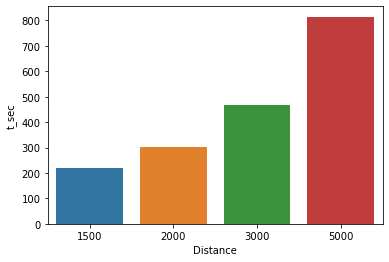

In [44]:
sns.barplot(x=cs['Distance'],y=cs['t_sec'],data=cs)

In [45]:
cs['t_sec']= cs['t_sec'].astype(int)

<AxesSubplot:xlabel='t_sec', ylabel='Distance'>

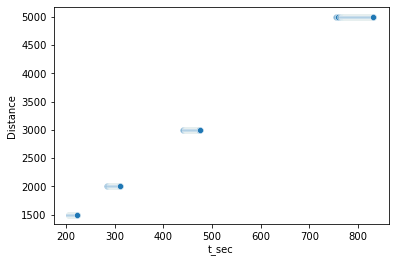

In [46]:
sns.scatterplot(x=cs['t_sec'],y=cs['Distance'],data=cs)

<AxesSubplot:>

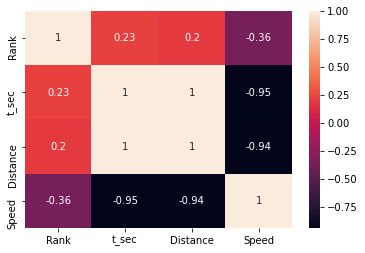

In [47]:
sns.heatmap(cs.corr(),annot=True)

In [48]:
X = cs['t_sec'].values.reshape(-1,1)
y= cs['Distance']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
#this is D'
print(lm.intercept_)

228.77221869662435


In [56]:
# This is CS 
print(lm.coef_)

[5.86477292]


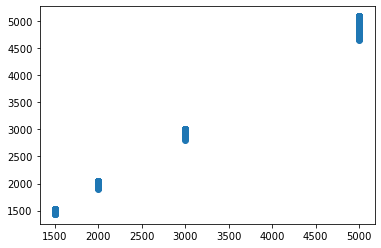

In [57]:
predictions = lm.predict(X_test)
#shows that the model predicted distance well 
plt.scatter(y_test,predictions)

In [58]:
from sklearn import metrics

In [70]:
print(f'MAS : {metrics.mean_absolute_error(y_test,predictions)}')
print(f'MSE : {metrics.mean_squared_error(y_test,predictions)}')
print(f'RMSE :{np.sqrt(metrics.mean_squared_error(y_test,predictions))}')

MAS : 42.2643466763252
MSE : 3626.6449623893955
RMSE :60.221632013665946


In [71]:
#now for the whole data 

model = lm.fit(X,y)

In [72]:
r_sq = model.score(X,y)
intercept = model.intercept_
slope= model.coef_

In [73]:
#critical speed
print(slope)

[5.86602876]


In [74]:
#D' above CS
print(intercept)

228.61193112640422


In [75]:
#model score 
print(r_sq)

0.9985408658403349


In [76]:
y_pred = slope*X + intercept

Text(120, 4500, ' R-squared= 0.99\n CS(m/s)= 5.86\n Distance(m) travelled above CS(D*)= 288.62')

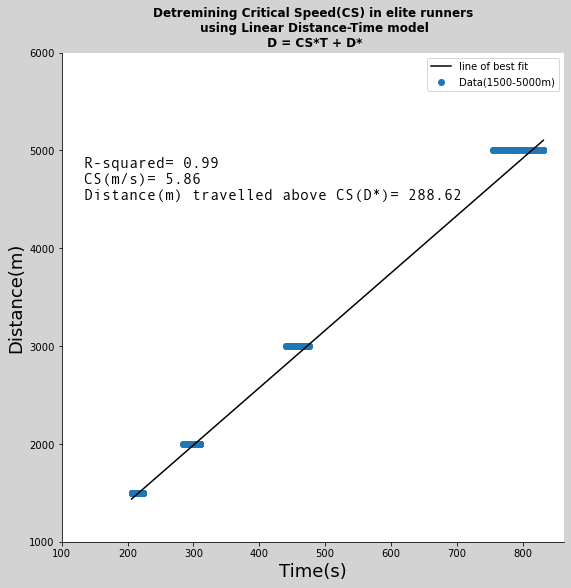

In [87]:
fig, ax = plt.subplots(figsize=(9,9))

fig.set_facecolor('lightgrey')
plt.scatter(X,y)
plt.plot(X,y_pred,c='black')
plt.xticks([100,200,300,400,500,600,700,800])
plt.yticks([1000,2000,3000,4000,5000,6000])

plt.legend(['line of best fit','Data(1500-5000m)'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Time(s)',fontsize=18)
plt.ylabel('Distance(m)',fontsize=18)
plt.title('Detremining Critical Speed(CS) in elite runners\n using Linear Distance-Time model\n D = CS*T + D*',fontweight='bold')

ax.annotate(text=' R-squared= 0.99\n CS(m/s)= 5.86\n Distance(m) travelled above CS(D*)= 288.62',xy=(120,4500),fontname='Andale Mono',fontsize=15,color='Black')

